# Tarea: Infinity War Pt.1

El objetivo de este
Primeramente hay que cargar librerías necesarias para la siguiente tarea

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

## k-means clustering

Los datos se generarán de manera aleatoria, siguiendo dos distribuciones _lognormal_ (como una normal chueca). Las "Etiquetas" de cada grupo de datos estarán ocultas en primer lugar, están dentro de la variable `labels`. Nos va a servir únicamente para verificar qué tan bien lo ha hecho el algoritmo:

In [2]:
data = pd.DataFrame(columns = ['X1','X2','Color'])
#Generado de la primer distribución
for i in range(0,200):
    data.loc[i] = [np.random.lognormal(2,0.4), np.random.lognormal(2,0.4), 0]
#Generado de la segunda distribución
for i in range(0,200):
    data.loc[i+200] = [25 - np.random.lognormal(2,0.4), 25 - np.random.lognormal(2,0.4), 1]

data = data.sample(frac=1).reset_index(drop=True)
labels = data.Color
data = data.drop(['Color'], axis = 1)

Podemos dar un vistazo a los datos con la siguiente función. Es claro que hay "Dos grupos" pero queremos una manera exacta de separarlos, discriminarlos

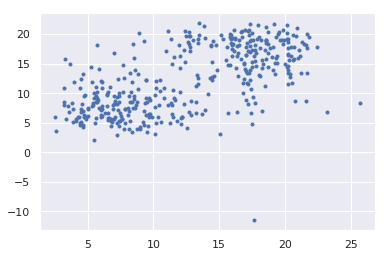

In [3]:
plt.plot(data.X1, data.X2,'.')
plt.show()

Por último, ejecutamos el algoritmo

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
predLabels = kmeans.predict(data)
centroids = kmeans.cluster_centers_

El siguiente bloque de código grafica los clusters en colores: Rojo un grupo, Azúl el otro, Verdes los puntos que están clasificados de manera incorrecta, cyan los centroides y ya.

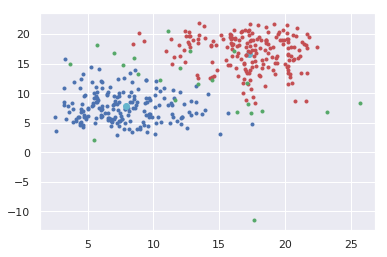

Porcentaje de clasificación:  0.9425


In [5]:
#We swap the labels to to get the one with the highest percentage
predLabels = np.logical_not(predLabels) if np.sum(predLabels == labels)/labels.shape[0] < 0.5 else predLabels
#First we plot correct group 0 labels
corrBlue = np.logical_and(labels == predLabels, labels == 0)
plt.plot(data[corrBlue].X1, data[corrBlue].X2,'b.')
plt.plot(centroids[0,0], centroids[0,1], 'co') #Cyan color
#Second we plot correct group 1 labels
corrRed = np.logical_and(labels == predLabels, labels == 1)
plt.plot(data[corrRed].X1, data[corrRed].X2,'r.')
plt.plot(centroids[1,0], centroids[1,1], 'co') #Cyan color
#Third, we plot incorrect labels
corrInc = labels != predLabels
plt.plot(data[corrInc].X1, data[corrInc].X2,'g.')
plt.show()

print("Porcentaje de clasificación: ", np.sum(predLabels == labels)/labels.shape[0])